In [18]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils_m1 import *
mpl.rc('text', usetex = True)
mpl.rc('font', family='SignPainter')

In [14]:
cath1_true_hits = []
cath1_reco_hits = []

cath2_true_hits = []
cath2_reco_hits = []

dir = '/Users/alex/Documents/2022_Summer/UH_Summer_2022/Research/Near_Detector/dan_cathode_crossers'
for filename in os.listdir(dir):
    file = os.path.join(dir, filename)
    d =  np.load(file, allow_pickle=True) 
    # cath1_true_hits.append( d[0][0] )
    # cath1_reco_hits.append( d[0][1] )
    # cath2_true_hits.append( d[1][0] )
    # cath2_reco_hits.append( d[1][1] )

    cath1_true_hits.extend( d[0][0] )
    cath1_reco_hits.extend( d[0][1] )
    cath2_true_hits.extend( d[1][0] )
    cath2_reco_hits.extend( d[1][1] )

In [51]:
#----------------------------------------------------------------------------#
# Visuals for 2d histo
#----------------------------------------------------------------------------#
def h2d_config( ax, extent, fs ):

    major_ticks_x = np.arange(-400, 400, 100)
    minor_ticks_x = np.arange(-400, 400, 50)
    major_ticks_y = np.arange(-900, 900, 100)
    minor_ticks_y = np.arange(-900, 900, 50)

    # ax.vlines(x=0 , ymin = -900, ymax = 900, colors='grey', linestyles='-', lw=2)

    ax.set_xticklabels( major_ticks_x , fontsize = fs)
    ax.set_yticklabels( major_ticks_y, fontsize=fs ) 

    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.tick_params(axis='both', which='minor', labelsize=fs)

    ax.grid(which='both', color = 'black', linestyle = '--', linewidth = 1)
    ax.grid(which='minor', alpha=1)
    ax.grid(which='major', alpha=1)

    ax.set_xlim(extent[0],extent[1])
    ax.set_ylim(extent[2], extent[3])

    ax.set_xlabel('$\mathrm{x_{reco}}$ [mm]',fontsize=fs)
#----------------------------------------------------------------------------#

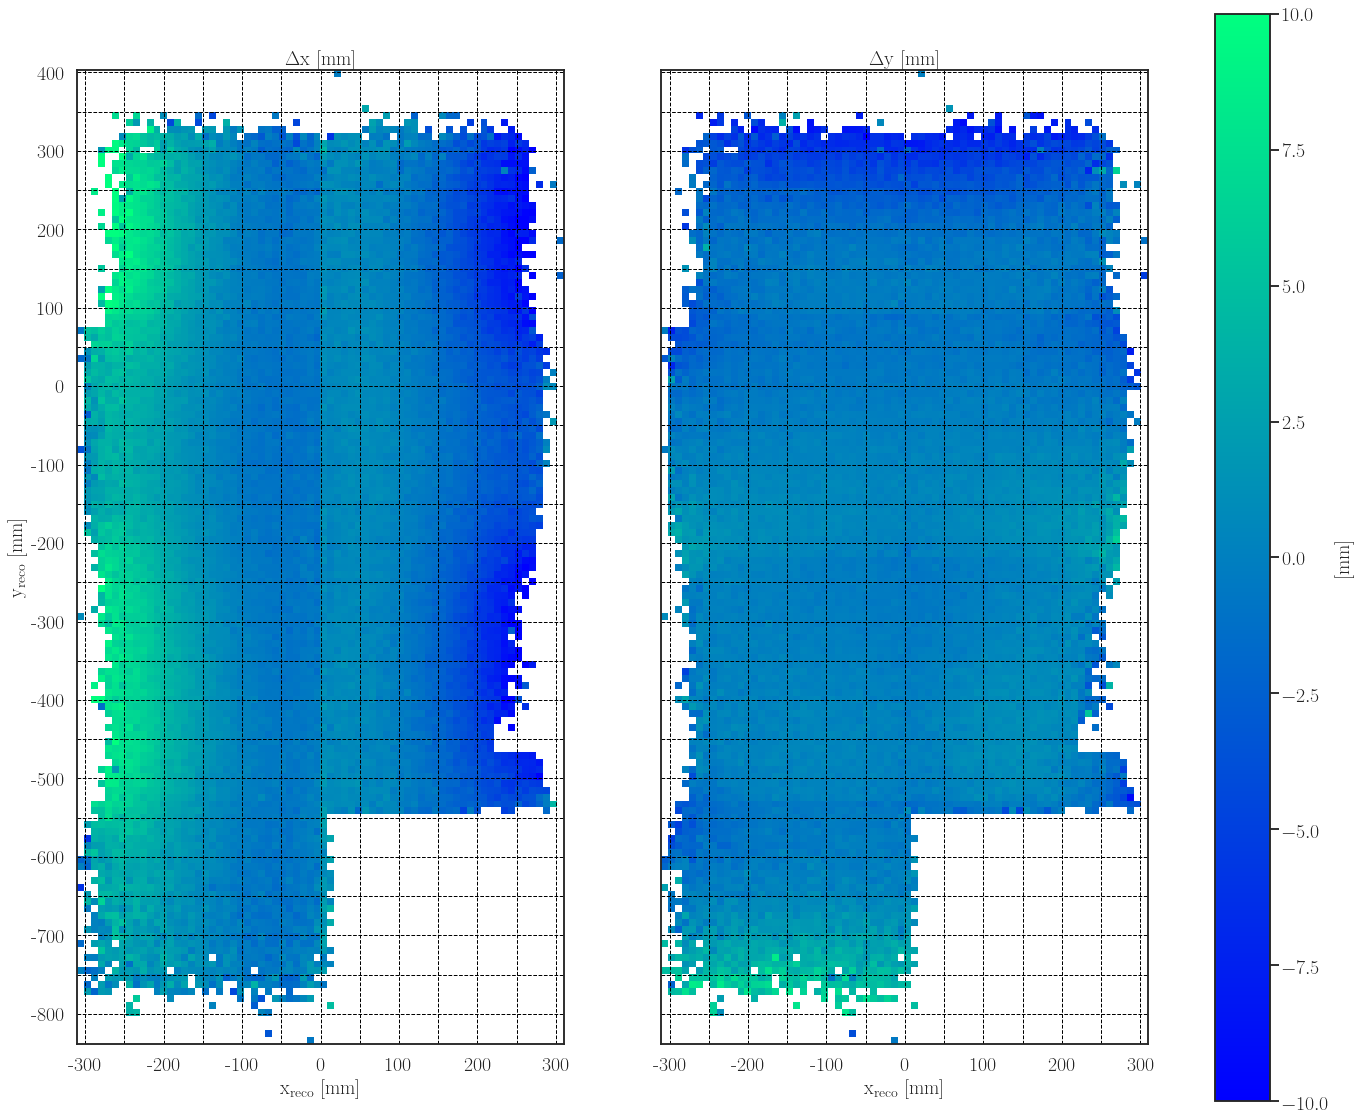

In [52]:
cath1_true_hits = np.array( cath1_true_hits  )
cath1_reco_hits = np.array( cath1_reco_hits )
delta = cath1_reco_hits - cath1_true_hits

x, y = cath1_reco_hits[:,0], cath1_reco_hits[:,1]
dx, dy = delta[:,0], delta[:,1]


pitch = 4.434 #Dan says 3.8
xbins = round( (2*310.38/pitch)/2 )
ybins = round( ((839+402.524)/pitch)/2 )


fig, axes = plt.subplots(1,2, figsize=(24, 20), sharex=True, sharey=True)

fs = 20 # Font size
vmax = 10 # Range on colorbar [cm]
extent = [-310.38,310.38, -839, 402.524]
range = [(-310.38,310.38), (-839, 402.524)]
bins = [xbins,ybins]
kwargs = dict(
    vmin=-vmax, vmax=vmax,
    cmap='winter',
    origin='lower',
    extent=extent,
    interpolation='none',
)
    
ax = axes[0]
pf = binned_statistic_2d(x, y, dx, bins=bins, range=range)
ax.imshow(pf.statistic.T, **kwargs)
ax.set_xlabel('$\mathrm{x_{r}}$ [mm]')
ax.set_ylabel('$\mathrm{y_{r}}$ [mm]')
ax.set_title('$\mathrm{\Delta x}$ [mm]')



ax.set_ylabel('$\mathrm{y_{reco}}$ [mm]',fontsize=fs)
ax.set_title('$\mathrm{\Delta x}$ [mm]',fontsize=fs)
# ax.tick_params(axis='both', which='minor', labelsize=fs)
h2d_config( ax, extent, fs )

ax = axes[1]
pf = binned_statistic_2d(x, y, dy, bins=bins, range=range)
im = ax.imshow(pf.statistic.T, **kwargs)
# ax.set_ylabel('$\mathrm{x_{reco}}$ [cm]',fontsize=fs)
# ax.set_xlabel('$\mathrm{z_{reco}}$ [cm]',fontsize=fs)
ax.set_title('$\mathrm{\Delta y}$ [mm]',fontsize=fs)
# ax.tick_params(axis='both', which='minor', labelsize=fs)
h2d_config( ax, extent, fs )

cax,kw = mpl.colorbar.make_axes(axes.flatten())
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(label='[mm]', size=fs)
cbar.ax.tick_params(labelsize=fs)
plt.show()

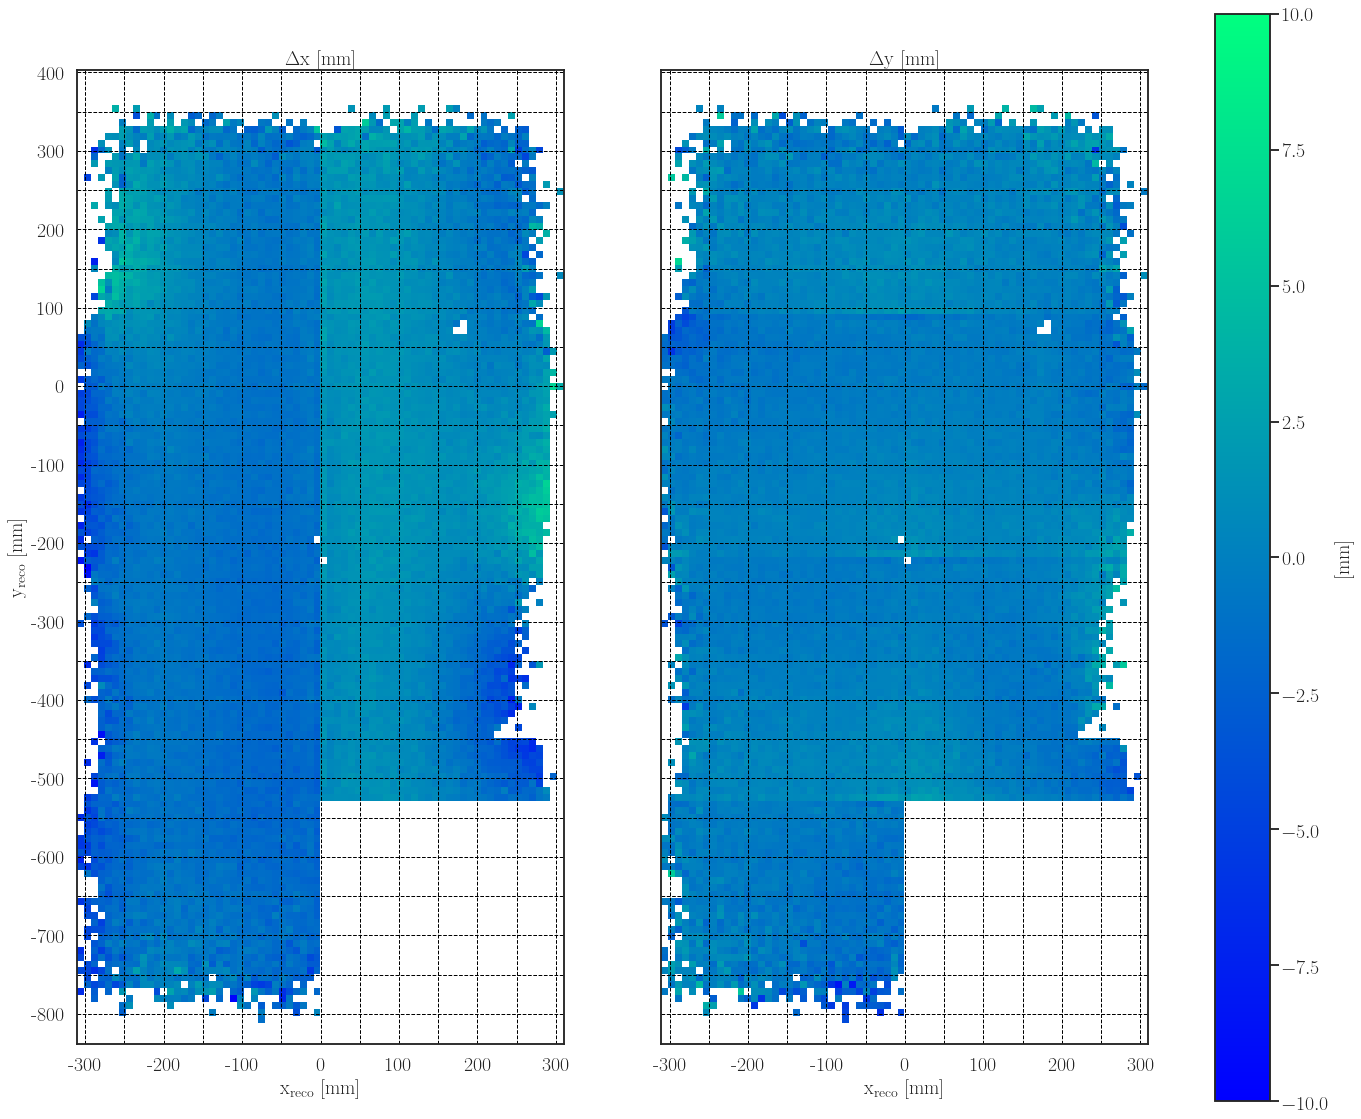

In [53]:
cath2_true_hits = np.array( cath2_true_hits  )
cath2_reco_hits = np.array( cath2_reco_hits )
delta2 = cath2_reco_hits - cath2_true_hits

x, y = cath2_reco_hits[:,0], cath2_reco_hits[:,1]
dx, dy = delta2[:,0], delta2[:,1]


pitch = 4.434 #Dan says 3.8
xbins = round( (2*310.38/pitch)/2 )
ybins = round( ((839+402.524)/pitch)/2 )


fig, axes = plt.subplots(1,2, figsize=(24, 20), sharex=True, sharey=True)

fs = 20 # Font size
vmax = 10 # Range on colorbar [cm]
extent = [-310.38,310.38, -839, 402.524]
range = [(-310.38,310.38), (-839, 402.524)]
bins = [xbins,ybins]
kwargs = dict(
    vmin=-vmax, vmax=vmax,
    cmap='winter',
    origin='lower',
    extent=extent,
    interpolation='none',
)
    
ax = axes[0]
pf = binned_statistic_2d(x, y, dx, bins=bins, range=range)
ax.imshow(pf.statistic.T, **kwargs)
ax.set_xlabel('$\mathrm{x_{r}}$ [mm]')
ax.set_ylabel('$\mathrm{y_{r}}$ [mm]')
ax.set_title('$\mathrm{\Delta x}$ [mm]')



ax.set_ylabel('$\mathrm{y_{reco}}$ [mm]',fontsize=fs)
ax.set_title('$\mathrm{\Delta x}$ [mm]',fontsize=fs)
# ax.tick_params(axis='both', which='minor', labelsize=fs)
h2d_config( ax, extent, fs )

ax = axes[1]
pf = binned_statistic_2d(x, y, dy, bins=bins, range=range)
im = ax.imshow(pf.statistic.T, **kwargs)
# ax.set_ylabel('$\mathrm{x_{reco}}$ [cm]',fontsize=fs)
# ax.set_xlabel('$\mathrm{z_{reco}}$ [cm]',fontsize=fs)
ax.set_title('$\mathrm{\Delta y}$ [mm]',fontsize=fs)
# ax.tick_params(axis='both', which='minor', labelsize=fs)
h2d_config( ax, extent, fs )

cax,kw = mpl.colorbar.make_axes(axes.flatten())
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(label='[mm]', size=fs)
cbar.ax.tick_params(labelsize=fs)
plt.show()

In [1]:
pitch = 4.434 #Dan says 3.8
xbins = round( (2*310.38/pitch)/2 )
ybins = round( ((839+402.524)/pitch)/2 )

In [2]:
xbins

70

In [3]:
round( 2*310.38 )/xbins

8.871428571428572

In [4]:
round(839+402.524)/ybins

8.871428571428572

In [137]:
pts = []

dir = '/Users/alex/Documents/2022_Summer/UH_Summer_2022/Research/Near_Detector/m1_AA_crossers'
for filename in os.listdir(dir):
    file = os.path.join(dir, filename)
    d = ( ( np.load(file, allow_pickle=True) )['data'] ).item()
    pts.append( d['pos']  )

pts = np.array(pts, dtype=object)

In [192]:
def get_coord(coord_idx):
    # coord_idx is eitehr 0, 1, or 2 (for x,y,z)

    q = []
    for a in pts:
        for b in a:
            q.append( b[coord_idx] )
    q = np.array(q, dtype=object)

    blah = []
    for e in q:
        blah.append( e.tolist() )

    Q = [x for xs in blah for x in xs] #Flatten list of lists

    return Q

In [193]:
X = get_coord(0)

In [198]:
Y = get_coord(1)

In [201]:
Z = get_coord(2)

In [224]:
def SciForm(number):
    return "{:e}".format(number)

In [215]:
# sns.jointplot(x=X, y=Y, kind='hex', color="#4CB391")
# plt.show()

In [ ]:
# print(anode_z) #304.31 [mm]
# print(cathode_z) #1.5875 [mm] or 1/16''
# print(top) #402.524
# print(bottom) #-839
# print(upstream) #310.38
# print(downstream) #-310.38

In [236]:
3.8*11

41.8

In [252]:
pitch = 4.434 #Dan says 3.8
xbins = round( (2*310.38/pitch)/10 )
ybins = round( ((839+402.524)/pitch)/10 )
zbins = round( (2*304.31/pitch)/10 )

In [253]:
zbins

16

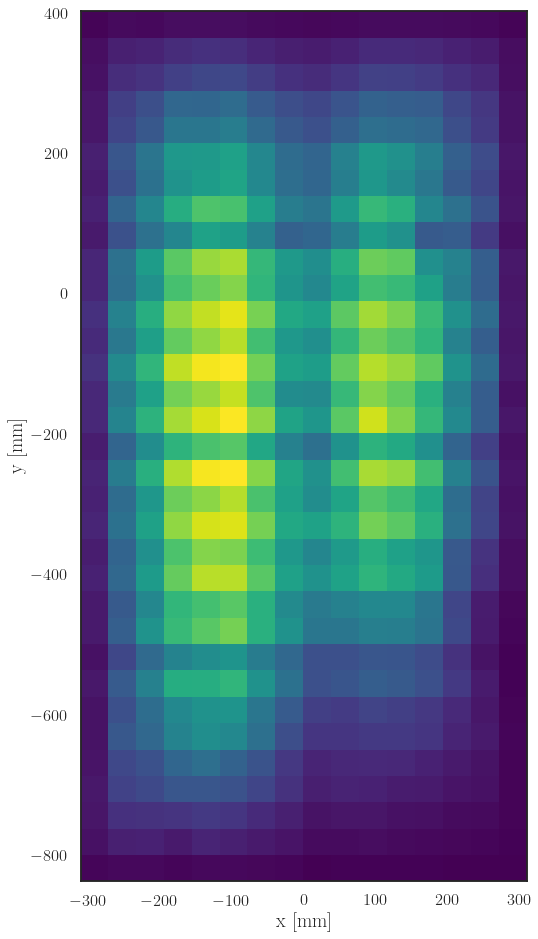

In [251]:
fig, ax = plt.subplots(figsize=(8,16))
extent = [[-310.38,310.38], [-839, 402.524]]
ax.hist2d(X, Y, bins =[xbins,ybins], range = extent, cmap=plt.get_cmap("viridis"))
# ax.hist2d(X, Y, bins =[120,240], range = extent, cmap=plt.get_cmap("viridis"))
  
ax.set_xlabel('x [mm]', fontsize=20)
ax.set_ylabel('y [mm]', fontsize=20)
ax.set_xlim(-310.38,310.38)
ax.set_ylim(-839, 402.524)

# plt.savefig('/Users/alex/Desktop/xy_occupancy.pdf')
plt.show()

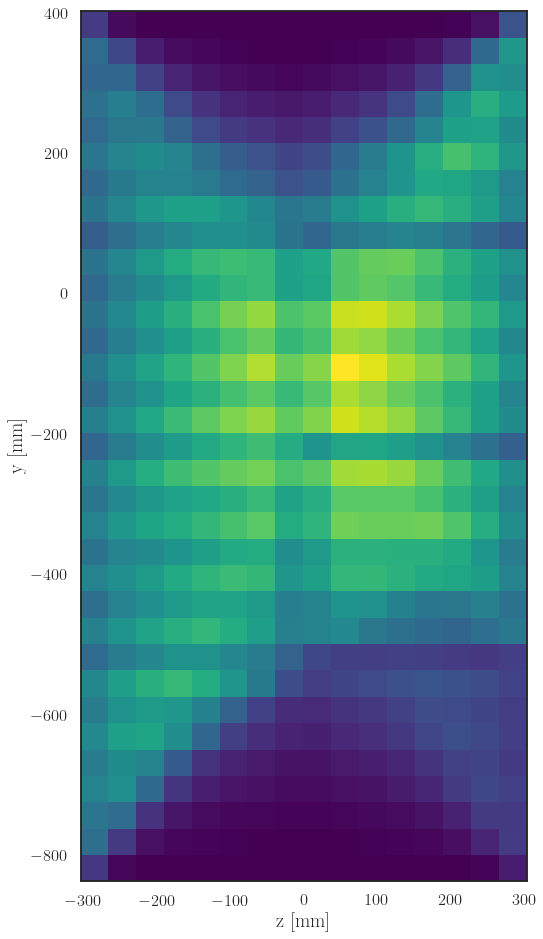

In [256]:
fig, ax = plt.subplots(figsize=(8,16))
extent = [[-304.31, 304.31], [-839, 402.524]]
ax.hist2d(Z, Y, bins =[zbins,ybins], range =extent, cmap=plt.get_cmap("viridis"))
# ax.hist2d(Z, Y, bins =[120,240], cmap=plt.get_cmap("viridis"))
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('y [mm]', fontsize=20)
ax.set_xlim(-304.31, 304.31)
ax.set_ylim(-839, 402.524)

# plt.savefig('/Users/alex/Desktop/yz_occupancy.pdf')
plt.show()

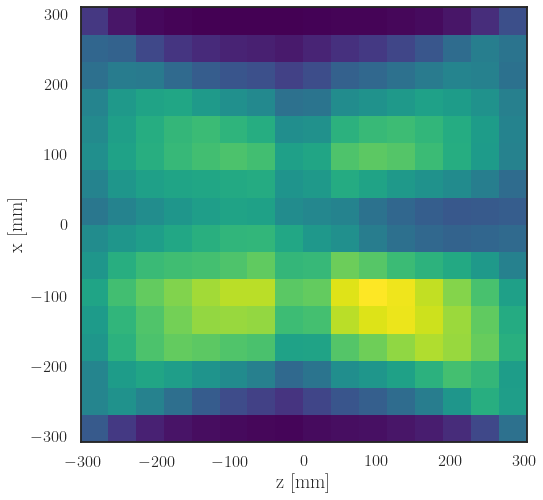

In [257]:
fig, ax = plt.subplots(figsize=(8,8))
extent = [[-304.31, 304.31], [-310.38,310.38]]
ax.hist2d(Z, X, bins =[zbins,xbins], range = extent, cmap=plt.get_cmap("viridis"))
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('x [mm]', fontsize=20)
ax.set_xlim(-304.31, 304.31)
ax.set_ylim(-310.38,310.38)


# plt.savefig('/Users/alex/Desktop/xz_occupancy.pdf')
plt.show()

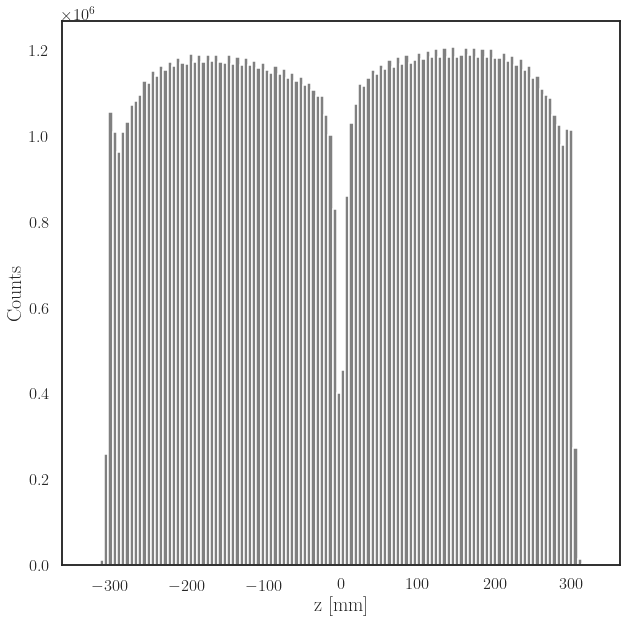

In [219]:
fig, ax = plt.subplots(figsize=(10,10))
# ax.hist(moop, bins = 12, range = (-310,310), color = 'Grey') #x
# ax.hist(moop, bins = 25, range = (-820,405), color = 'Grey') #y
ax.hist(Z, bins = 120, range = (-330,330), color = 'Grey') #z
# ax.axvline(x=-1.58, color = 'black', ls = '--')
# ax.axvline(x=1.58, color = 'black', ls = '--')
  
# ax.set_xlabel('y [mm]', fontsize=20)
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/z_occupancy.pdf')
plt.show()

In [207]:
(310*2)/50

12.4

In [179]:
660/100

6.6

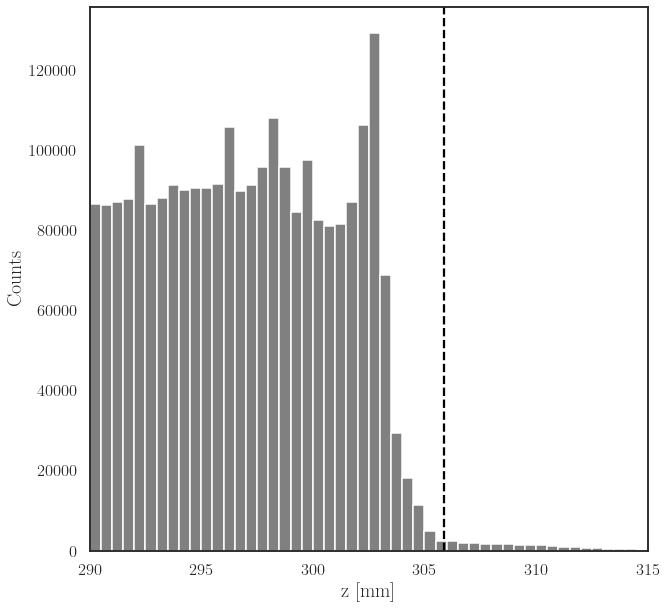

In [326]:
fig, ax = plt.subplots(figsize=(10,10))
edge = 304.31 + 1.58
ax.hist(Z, bins = 50, range = (290,315), color = 'Grey')
ax.axvline(x=edge, color = 'black', ls = '--')
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.set_xlim(290,315)
# plt.savefig('/Users/alex/Desktop/right_all.pdf')
plt.show()

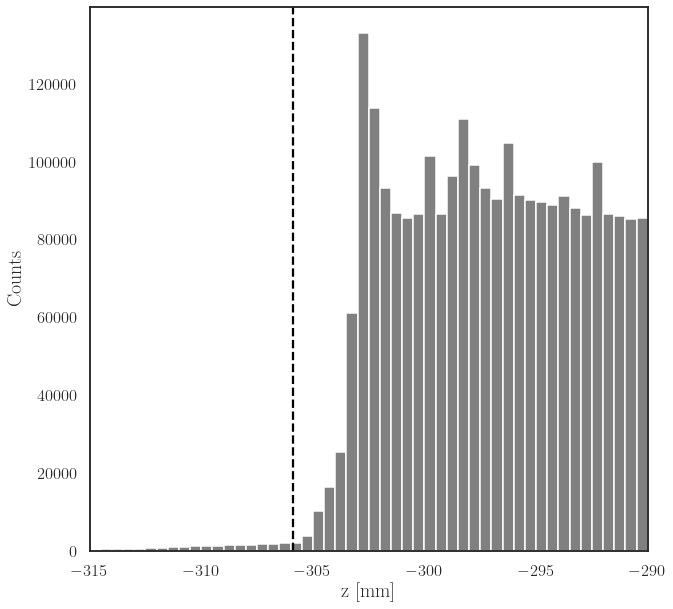

In [327]:
fig, ax = plt.subplots(figsize=(10,10))
edge = -(304.31 + 1.58)
ax.hist(Z, bins = 50, range = (-315,-290), color = 'Grey')
ax.axvline(x=edge, color = 'black', ls = '--')
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.set_xlim(-315, -290)
# plt.savefig('/Users/alex/Desktop/left_all.pdf')
plt.show()

In [259]:
max(Z)

324.8365590811748

In [260]:
min(Z)

-323.893791783571

In [ ]:
import os
import numpy as np

endpts = []

dir = 'path/to/dir'
for filename in os.listdir(dir):
    file = os.path.join(dir, filename)
    d = ( ( np.load(file, allow_pickle=True) )['data'] ).item()
    endpts.append(  np.array( d['start'] )  )
    endpts.append( np.array( d['end'] )  )

endpts = np.array(endpts, dtype=object)

zs = []
for pts in endpts:
    zs.append( pts[:,2] )
zs = np.array(zs, dtype=object)


zs_lists = []
for e in zs:
    zs_lists.append( e.tolist() )

z_flat = [x for xs in zs_lists for x in xs] #Flatten list of lists

In [280]:
endpts = []

dir = '/Users/alex/Documents/2022_Summer/UH_Summer_2022/Research/Near_Detector/m1_AA_crossers'
for filename in os.listdir(dir):
    file = os.path.join(dir, filename)
    d = ( ( np.load(file, allow_pickle=True) )['data'] ).item()
    endpts.append(  np.array( d['start'] )  )
    endpts.append( np.array( d['end'] )  )


endpts = np.array(endpts, dtype=object)

zs = []
for pts in endpts:
    zs.append( pts[:,2] )
zs = np.array(zs, dtype=object)


zs_lists = []
for e in zs:
    zs_lists.append( e.tolist() )

z_flat = [x for xs in zs_lists for x in xs] #Flatten list of lists

In [335]:
len(z_flat)/2

388227.0

In [347]:
how_many = 0
for z in zs:
    how_many += len(z)
how_many = how_many/2

In [348]:
how_many

388227.0

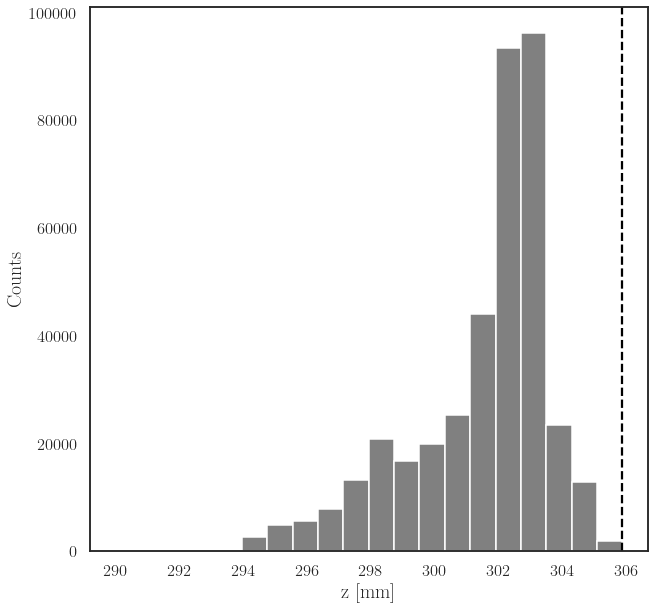

In [315]:
fig, ax = plt.subplots(figsize=(10,10))
edge = 304.31 + 1.58
pitch = 3.8 # 4.434
ax.hist(z_flat, bins = 20, range = (290,edge), color = 'Grey')
ax.axvline(x=edge, color = 'black', ls = '--')
# ax.axvline(x=edge - pitch, color = 'black', ls = '--')
# ax.axvline(x=edge - 2*pitch, color = 'black', ls = '--')
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/right.pdf')
plt.show()

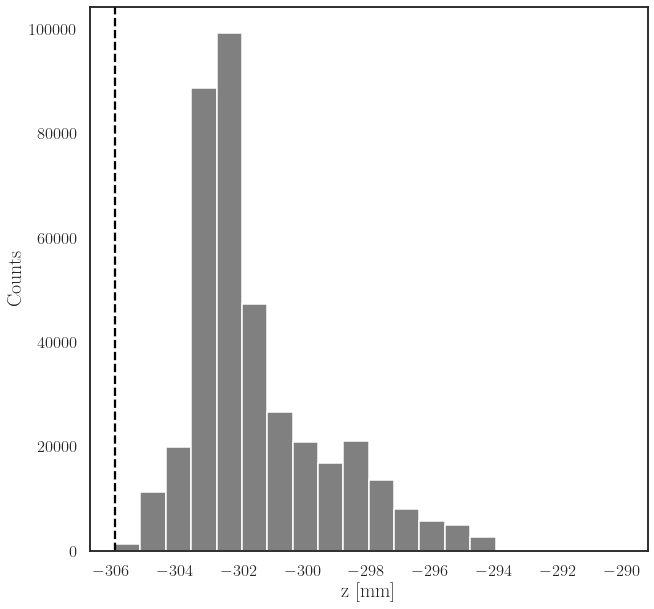

In [316]:
fig, ax = plt.subplots(figsize=(10,10))
edge = -(304.31 + 1.58)
pitch = 3.8 # 4.434
ax.hist(z_flat, bins = 20, range = (edge,-290), color = 'Grey')
ax.axvline(x=edge, color = 'black', ls = '--')
# ax.axvline(x=edge + pitch, color = 'black', ls = '--')
# ax.axvline(x=edge + 2*pitch, color = 'black', ls = '--')
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/left.pdf')
plt.show()

In [290]:
tick = 0.1 #us
vdrift = 0.1648 #vdrift cm/us

In [293]:
z_res = 10*(tick*vdrift) #min z bin in mm

In [294]:
z_res

0.1648

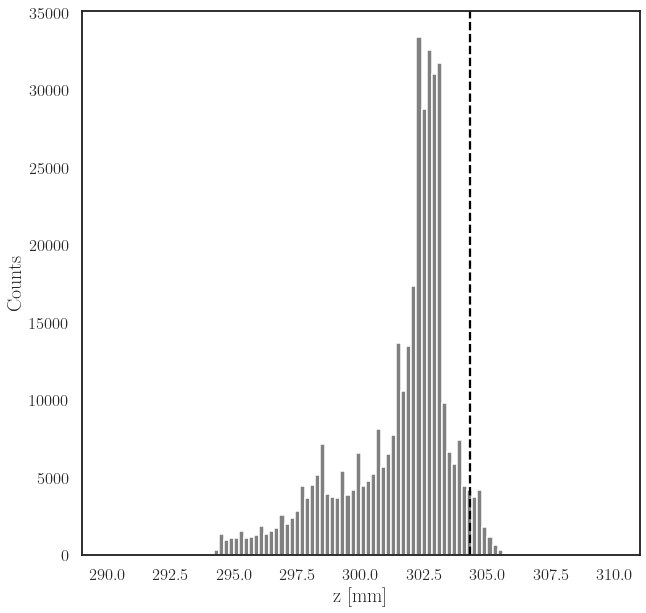

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(moop, bins = 100, range = (290,310), color = 'Grey')
ax.axvline(x=304.31, color = 'black', ls = '--')
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/right.pdf')
plt.show()

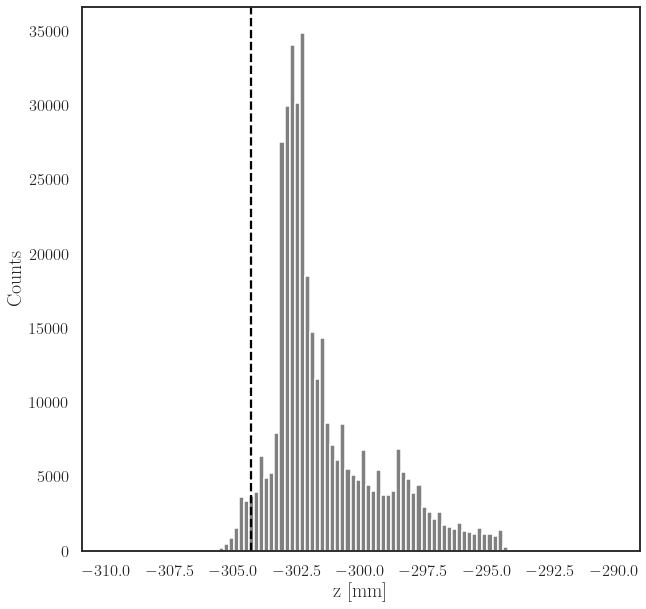

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(moop, bins = 100, range = (-310,-290), color = 'Grey')
ax.axvline(x=-304.31, color = 'black', ls = '--')
  
ax.set_xlabel('z [mm]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/left.pdf')
plt.show()

In [ ]:
# d = ( ( np.load('selection_test.npz', allow_pickle=True) )['data'] ).item() # If compressed
# # d = ( np.load('selection_test.npy', allow_pickle=True) ).item() # If not compressed 

# positions = d['pos']
# starts = d['start']
# ends = d['end']

In [19]:
def angle_between_AA_PCA(pts,endpts):

    pos3d = np.column_stack( [ pts[0], pts[1], pts[2] ] )
    endpts3d = np.column_stack( [ endpts[0], endpts[1], endpts[2] ] )
   
    pca = PCA(1)
    pca.fit(pos3d)
    
    v_dir = pca.components_[0]
    # want v_dir to have well-defined handedness
    # to make a consistent sense of TPC ordering
    if v_dir[2] > 0:
        v_dir *= -1

    pca = PCA(1)
    pca.fit(endpts3d)
    AA_dir = pca.components_[0]
    if AA_dir[2] > 0:
        AA_dir *= -1

    dot_product = np.dot(v_dir, AA_dir)
    rad = np.arccos(dot_product)
    deg = np.rad2deg(rad)

    return deg

In [145]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as plt3d
# from plotting import draw_boundaries

fig = go.Figure(layout=plot_theme.layout3d_white)
colors = cycle(plot_theme.DEFAULT_SEQUENCE)

dir = '/Users/alex/Documents/2022_Summer/UH_Summer_2022/Research/Near_Detector/m1_AA_crossers'
ticker = 0
angles1 = []
angles2= []

max_trks_show = 5
n_trks = 0

for filename in os.listdir(dir):
    if ticker > 30:
        break
    if n_trks >= max_trks_show:
        break
    file = os.path.join(dir, filename)
    d = ( ( np.load(file, allow_pickle=True) )['data'] ).item()

    starts = d['start']
    ends = d['end']
    all_pts = d['pos']

    idx = len(starts)
    # print(idx)

    for i in range(idx):
        if n_trks >= max_trks_show:
            break

        # Potential bug in A-A selection:
        # Both z endpoints could have been near one anode (~ close to pixel plane)
        # Look for cases where the endpoints are on opposite sides
        # if (abs( starts[i][2] - ends[i][2] ) > 500): 
        if (abs( starts[i][2] - ends[i][2] ) > 500) and ( (starts[i][0] < 60) and (starts[i][0] > 0) ) and ( (ends[i][0] < 60) and (ends[i][0] > 0) ) and (abs(starts[i][1]) < 100) and (abs(ends[i][1]) < 100): 

            endpts = np.column_stack( [ starts[i],ends[i] ]  )
            pts = all_pts[i]
            mask1 = pts[2] > 250
            mask2 = pts[2] > 100
            pts1 = [pts[0][mask1], pts[1][mask1], pts[2][mask1] ]
            pts2 = [pts[0][mask2], pts[1][mask2], pts[2][mask2] ]
            # print( len( pts[0] ) )

            # print( endpts.shape )
            # print( pts.shape )
            # mask = pts[:,3] < -200
            # print( mask )

            if (len( pts1[0] ) > 0) and (len( pts2[0] ) > 0):
                deg1 = angle_between_AA_PCA(pts1,endpts)
                deg2 = angle_between_AA_PCA(pts2,endpts)

                #If discrepancy same regardless of the number of hits used, visualize
                if abs(deg1-deg2) > 1e-6: 

                    angles1.append(deg1)
                    angles2.append(deg2)
                    # print( pts.shape )
                    # print(endpts)

                    # Plot A-A line
                    fig.add_trace(
                        go.Scatter3d(
                            x=endpts[0],
                            y=endpts[1],
                            z=endpts[2],
                            mode='lines',
                            line_width=5,
                            line_color=plot_theme.TURQ,
                        )
                    )

                    # Plot hits
                    fig.add_trace(
                        go.Scatter3d(
                            x=pts[0], y=pts[1], z=pts[2],
                            mode='markers',
                            marker_size=3,
                            marker_color=next(colors),
                        )
                    )

                    # # Plot A-A line
                    # fig.add_trace(
                    #     go.Scatter(
                    #         x=endpts[0],
                    #         y=endpts[2],
                    #         mode='lines',
                    #         line_width=5,
                    #         line_color=plot_theme.TURQ,
                    #     )
                    # )

                    # # Plot hits1
                    # fig.add_trace(
                    #     go.Scatter(
                    #         x=pts[0], y=pts[2],
                    #         mode='markers',
                    #         marker_size=3,
                    #         marker_color=next(colors),
                    #     )
                    # )

                    n_trks += 1



                # angles1.append(deg1)
                # angles2.append(deg2)
            # print(deg)


        # d['pos']
        # d['start']
        # d['end']

        # d['pos']
        # print( len( starts ) )
        # print( d['end'] )


    ticker += 1

# print( len(angles) )


det = './detector_properties/module0.yaml'
geo = './pixel_layouts/module1_layout-2.3.16.yaml'
my_geometry = DetectorGeometry(det, geo)
TPC_bounds = get_TPC_bounds()
anode_z = TPC_bounds[1][2][0]
cathode_z = TPC_bounds[1][2][1]
top = TPC_bounds[0][1][1]
bottom = TPC_bounds[0][1][0]
upstream = TPC_bounds[0][0][1]
downstream = TPC_bounds[0][0][0]


# fig.update_yaxes(
#     scaleanchor = "x",
#     scaleratio = 1,
#   )

# XR=upstream-downstream
# YR=top-bottom
# ZR=2*anode_z

# yscale=YR/ZR
# xscale=XR/ZR


fig.update_scenes(
    # xaxis_range=(downstream,upstream),
    xaxis_range=(-10,70),
    # xaxis_range=(240,upstream),
    yaxis_range=(-100,100),
    # yaxis_range=(100,top),
    # yaxis_range=(bottom,top),
    # yaxis_range=(-anode_z,anode_z),
    zaxis_range=(-anode_z,anode_z),
    aspectmode='data', #cube, manual
    # aspectratio=dict(x=xscale, y=1),
    # aspectratio=dict(x=xscale, y=yscale, z=1),
    xaxis_title='x [mm]',
    yaxis_title='y [mm]',
    # yaxis_title='z [mm]',
    zaxis_title='z [mm]',
)

# fig.update_xaxes(range=[0, upstream])
# fig.update_yaxes(range=[-anode_z,anode_z])

fig.show()
# fig.write_html("/Users/alex/Desktop/evd2.html")

In [146]:
len(angles1)

5

In [147]:
len(angles2)

5

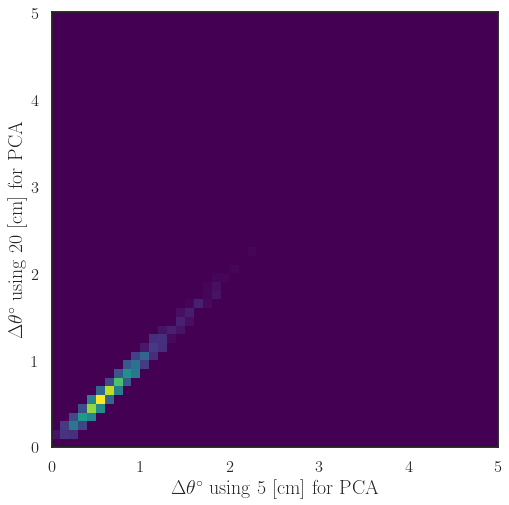

In [98]:
fig, ax = plt.subplots(figsize=(8,8))
angle_range = 5
bns=10*angle_range
extent = [[0, angle_range], [0,angle_range]]
ax.hist2d(angles1, angles2, bins =[bns,bns], range = extent, cmap=plt.get_cmap("viridis"))
  
ax.set_xlabel(r'$\Delta{\theta}^{\circ}$ using 5 [cm] for PCA', fontsize=20)
ax.set_ylabel(r'$\Delta{\theta}^{\circ}$ using 20 [cm] for PCA', fontsize=20)
# r"$\Delta{\theta}$ [Degrees] using 20 [mm] for PCA"
ax.set_xlim(0, angle_range)
ax.set_ylim(0, angle_range)

# plt.savefig('/Users/alex/Desktop/variable_PCA_comparison.pdf')
plt.show()

In [46]:
len(angles1)

89308

In [47]:
len(angles2)

89308

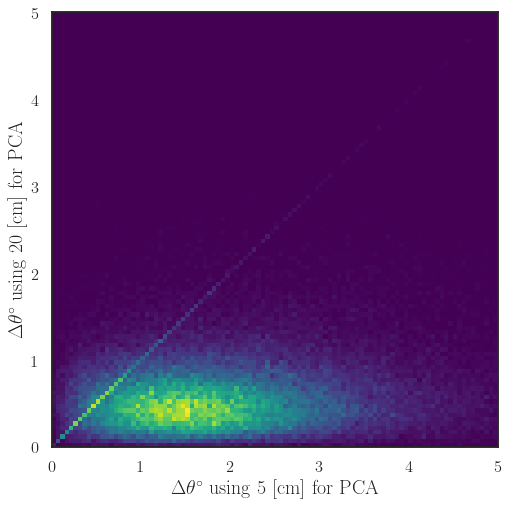

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
angle_range = 5
bns=20*angle_range
extent = [[0, angle_range], [0,angle_range]]
ax.hist2d(angles1, angles2, bins =[bns,bns], range = extent, cmap=plt.get_cmap("viridis"))
  
ax.set_xlabel(r'$\Delta{\theta}^{\circ}$ using 5 [cm] for PCA', fontsize=20)
ax.set_ylabel(r'$\Delta{\theta}^{\circ}$ using 20 [cm] for PCA', fontsize=20)
# r"$\Delta{\theta}$ [Degrees] using 20 [mm] for PCA"
ax.set_xlim(0, angle_range)
ax.set_ylim(0, angle_range)

# plt.savefig('/Users/alex/Desktop/variable_PCA_comparison.pdf')
plt.show()

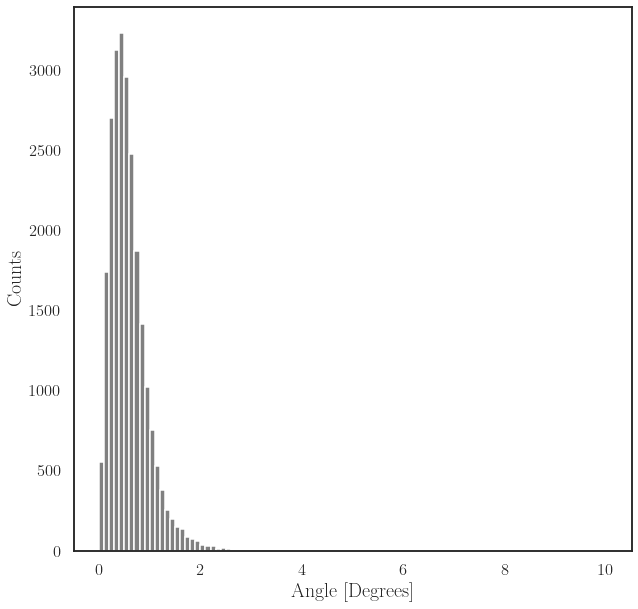

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(angles, bins = 100, range = (0,10), color = 'Grey')
  
ax.set_xlabel('Angle [Degrees]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/AA_PCA_comparison.pdf')
plt.show()

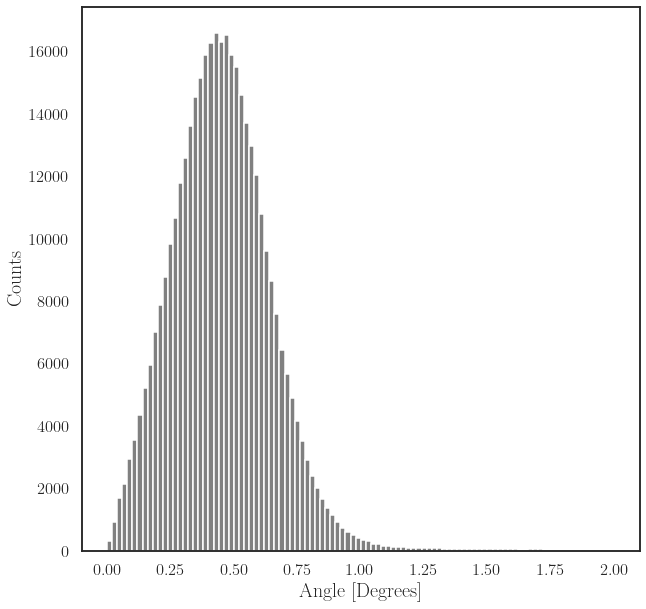

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(angles, bins = 100, range = (0,2), color = 'Grey')
  
ax.set_xlabel('Angle [Degrees]', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# plt.savefig('/Users/alex/Desktop/AA_PCA_comparison.pdf')
plt.show()